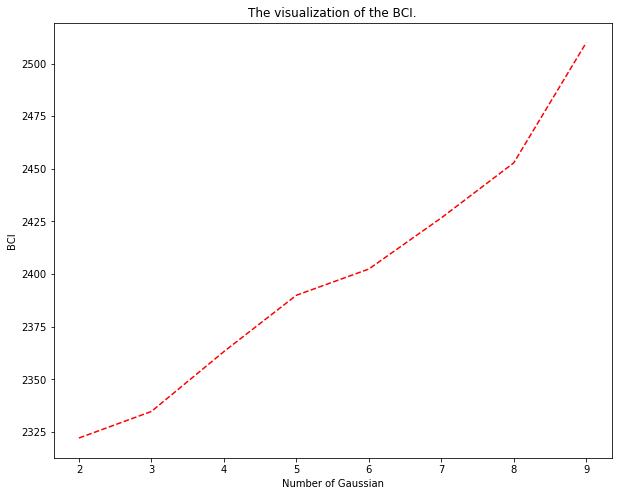

prior : [0.64407255 0.35592745]
mean : [[ 4.28977944 79.96953298]
 [ 2.03652149 54.47986018]]
variance : [[[ 0.16982046  0.93871793]
  [ 0.93871793 36.02497019]]

 [[ 0.06927449  0.43627723]
  [ 0.43627723 33.70493352]]]
is Converged : True


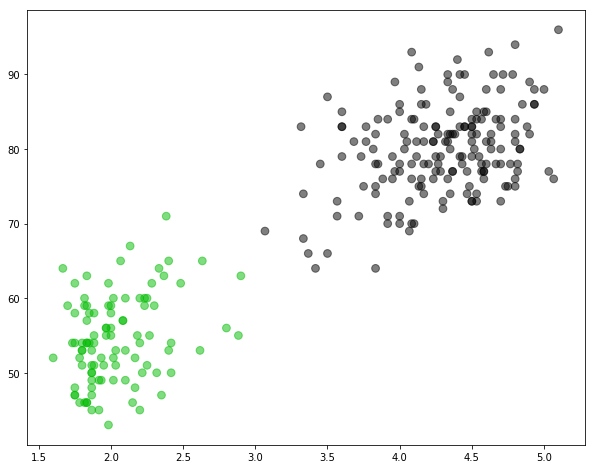

In [2]:

# Question 1

import numpy as np

import os

import matplotlib.pyplot as plt

import matplotlib.mlab as mlab

import pandas

from sklearn import mixture

import matplotlib.cm as cm

%matplotlib inline
  
relativePath=os.getcwd()

dataFilePath=relativePath+"\oldFaithful.csv"


def calBCI(maxNumberOfK):

    data = pandas.read_csv(dataFilePath)

    values=data

    bic=[] #list to hold a series of BCI values

    for K in range(2,maxNumberOfK): #for different value of K find BCI

            gmm = mixture.GaussianMixture(n_components=K) #train the model

            gmm.fit(values) #fit the data to the model

            bic.append(gmm.bic(values))#calculate BCI score

  

    fig2, (ax2) = plt.subplots(1, 1)

    fig2.set_size_inches(10, 8)

    plt.plot(range(2, maxNumberOfK), bic, 'r--')

    ax2.set_title("The visualization of the BCI.")

    ax2.set_xlabel("Number of Gaussian")

    ax2.set_ylabel("BCI")

    plt.xticks(range(2, maxNumberOfK))

    plt.show()


def EM(K):

    data = pandas.read_csv(dataFilePath)

    values=data

    gmm = mixture.GaussianMixture(n_components=K)

    gmm.fit(values)

    predictedLabel=gmm.predict(values) #predict the label

    print ("prior :",gmm.weights_)

    print ("mean :",gmm.means_)

    print ("variance :",gmm.covariances_)

    print ("is Converged :",gmm.converged_)

    fig, (ax1) = plt.subplots(1, 1)

    fig.set_size_inches(10, 8)

    colors = cm.nipy_spectral(predictedLabel.astype(float) / K)  # calculate color for each cluster

    ax1.scatter(data.iloc[:, 0], data.iloc[:, 1], marker='o', s=60, lw=1, alpha=0.5, c=colors)

    plt.show()


calBCI(10) # From the plot below, we see that the value of K which gives lowest BCI is 2

EM(2) #running the EM algorithm for k=2

Co-variance Matrix Dimension  (4, 4)
Eigen Value [4.19667516 0.24062861 0.07800042 0.02352514]
Eigen Vector [[ 0.36158968 -0.65653988 -0.58099728  0.31725455]
 [-0.08226889 -0.72971237  0.59641809 -0.32409435]
 [ 0.85657211  0.1757674   0.07252408 -0.47971899]
 [ 0.35884393  0.07470647  0.54906091  0.75112056]]
Perpendicular  []
****************************************
[array([0.34938412, 0.80284479, 0.50020712]), array([0.224844  , 0.30464402])]


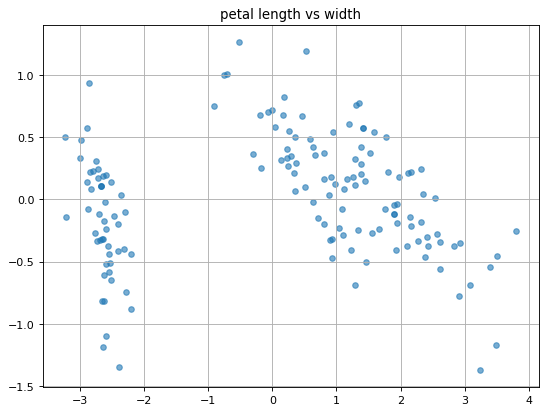

In [3]:
# Question 2

import numpy as np
import os
from numpy import linalg as LA
import matplotlib.pyplot as plt
import pandas


relativePath=os.getcwd()
dataFilePath=relativePath+"/iris.csv"
data = pandas.read_csv(dataFilePath)

def meanTransformation(labelColumnName,isRemoveLable=True): # make a zero mean data set
    for i in data.columns: #take all the columns one by one
        if i == labelColumnName:# skip the label column
            continue
        mean = data[i].mean() #find the mean of the column
        data[i] = data[i].apply(lambda d: d - mean) #substract mean from each value of the column

    if isRemoveLable: #if this flag is true then remove the label column from the data set
        columnName = [col for col in data.columns if col not in labelColumnName]
        dataFrame=data[columnName]
        return dataFrame
    return data


def calCoVarianceMatrix(data):
        m=data.shape[0] #get number of rows
        covarianceMatrix=(float(1)/m)*np.dot(data.T,data)#compute 1/m*(X^TX)
        print ("Co-variance Matrix Dimension ", covarianceMatrix.shape)
        return covarianceMatrix

def PCA(K):
    data=meanTransformation("class") # Step 1 : create a zero mean data set
    sigma=calCoVarianceMatrix(data) # Step 2: calculate covariance matrix
    eigenValue,eigenVector=LA.eig(sigma) #Step 3,4: calculate Eigen value and Eigen vector
    print ("Eigen Value",eigenValue)  # Eigen value and vectors are already arranged in descending order
    print ("Eigen Vector",eigenVector)
    print ("Perpendicular ", np.dot(eigenVector[:, :0].T, eigenVector[:, :1])) # check if Eigen vectors are perpendicular are not
    print ("****************************************")
    return np.dot(data,eigenVector[:,0:K]) #step 5 and 6 : select first K eigen vector and calculate dotproduct of data and selected eigen vectors

Z=PCA(2)
plt.figure(figsize=(8, 6), dpi=80)
ax=plt.subplot(1, 1, 1)
colors1 = np.random.rand(3) # color should be either 3 or 4 elements long ir corresponds to rgb and must be smaller than 1
#print(colors1)
colors2=np.random.rand(2) # for two points , length and width , we need two different color
c=[colors1,colors2]
print(c)
#print(colors2)
plt.scatter(Z[:,0],Z[:,1],s=25, alpha=.6) # generates scatter plot, alpha determines opacity of the points generated it must be between 0 and 1. s determines size of the dots
ax.set_title('petal length vs width')
ax.grid(True)
plt.show()

